# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

### Import libraries


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

from utils.plottings import plot_learning_curve
from utils.helpers_Garden import visualize_tree, plot_tree_interactive, randomized_tree_interactive, visualize_classifier

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (25.0, 10.0)
sns.set()

## Bagging classifier

In the bagging algorithm, the first step involves creating multiple models. These models are generated using the same algorithm with random sub-samples of the dataset which are drawn from the original dataset randomly with bootstrap sampling method. In bootstrap sampling, some original examples appear more than once and some original examples are not present in the sample. If you want to create a sub-dataset with m elements, you should select a random element from the original dataset m times. And if the goal is generating n dataset, you follow this step n times.

As said, _bagging_ is an ensemble technique mainly used to reduce the variance of our predictions by combining the result of multiple classifiers modelled on different sub-samples of the same data set.

<p align="center">
    <img width="650" src="https://vitalflux.com/wp-content/uploads/2021/10/bagging-classifier.png">
</p>

### Main steps for bagging

Here we illustrate the steps to compose a bagging classifier putting together other simple learners.

* __Creating multiple datasets__: Sampling is done with a replacement on the original data set and new datasets are formed from the original dataset.
* __Building multiple classifiers__: On each of these smaller datasets, a classifier is built, usually, the same classifier is built on all the datasets, however, this is not compulsory.
* __Combining Classifiers__: The predictions of all the individual classifiers are now combined to give a better classifier, usually with very less variance compared to before.

Bagging is a kind of _divide and conquer_ strategy. 
It is a group of predictive models run on multiple subsets from the original dataset combined together to achieve better accuracy and model stability.

### Historical example: Analysis of the relationship between ozone and temperature

The relationship between temperature and ozone in this data set is apparently non-linear, based on the scatter plot. Instead of building a single prediction model from the complete data set, $100$ samples of the data were drawn. 
Each sample is different from the original data set, yet resembles it in distribution and variability. 
Predictions from these $100$ were then samples made across the range of the data. 
The first $10$ predicted smooth fits appear as grey lines in the figure below. 
The lines are clearly very wiggly and they overfit the data — a result of the bandwidth being too small.

<p align="center">
    <img width="650" src="https://miro.medium.com/max/862/0*tqN6x3YhDEBIjWMZ.png">
</p>

By taking the average of $100$ smoothers, each fitted to a subset of the original data set, we arrive at one _bagged predictor_ (red line).
Clearly, the mean is more stable and there is less overfit.

### Common Bagging algorithms

* Bagging meta-estimator
* Random forest

We are going to see applications of both of them in the following.

### Wine example 🍷

In [2]:
dataset = load_wine()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### KNN classifier model

Let's classify our wines by a KNN algorithm.

In [3]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train);

Let's see how the model performed on test data by a classification report.

In [4]:
print(classification_report(y_test, knn.predict(X_test), target_names=dataset.target_names))

              precision    recall  f1-score   support

     class_0       0.79      0.92      0.85        12
     class_1       0.75      0.55      0.63        22
     class_2       0.33      0.45      0.38        11

    accuracy                           0.62        45
   macro avg       0.62      0.64      0.62        45
weighted avg       0.66      0.62      0.63        45



While on training data it seems a bit better.

In [5]:
print(classification_report(y_train, knn.predict(X_train), target_names=dataset.target_names))

              precision    recall  f1-score   support

     class_0       0.88      0.96      0.92        47
     class_1       0.93      0.82      0.87        49
     class_2       0.82      0.86      0.84        37

    accuracy                           0.88       133
   macro avg       0.88      0.88      0.88       133
weighted avg       0.88      0.88      0.88       133



Hence we have a clear overfit problem.

#### Bagging meta-classifier

Here we illustrate the use of the meta-classifier that takes many KNN classifiers and combine them to reduce overfit.

In [6]:
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                         n_estimators=25, max_samples=0.8, random_state=1).fit(X_train, y_train);

We are ready to print classification report for this classsifier.

In [7]:
print(classification_report(y_test, clf.predict(X_test), target_names=dataset.target_names))

              precision    recall  f1-score   support

     class_0       0.85      0.92      0.88        12
     class_1       0.82      0.64      0.72        22
     class_2       0.40      0.55      0.46        11

    accuracy                           0.69        45
   macro avg       0.69      0.70      0.69        45
weighted avg       0.73      0.69      0.70        45



By far better than the single model.

Let's change the base estimator with a logistic regression for example.

In [8]:
clf = BaggingClassifier(base_estimator=LogisticRegression(solver="newton-cg", max_iter=3000),
                         n_estimators=15, random_state=42).fit(X_train, y_train);

In [9]:
print(classification_report(y_test, clf.predict(X_test), target_names=dataset.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.96      1.00      0.98        22
     class_2       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.99      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Compare learning curves

Let's compare learning curves of the models above.

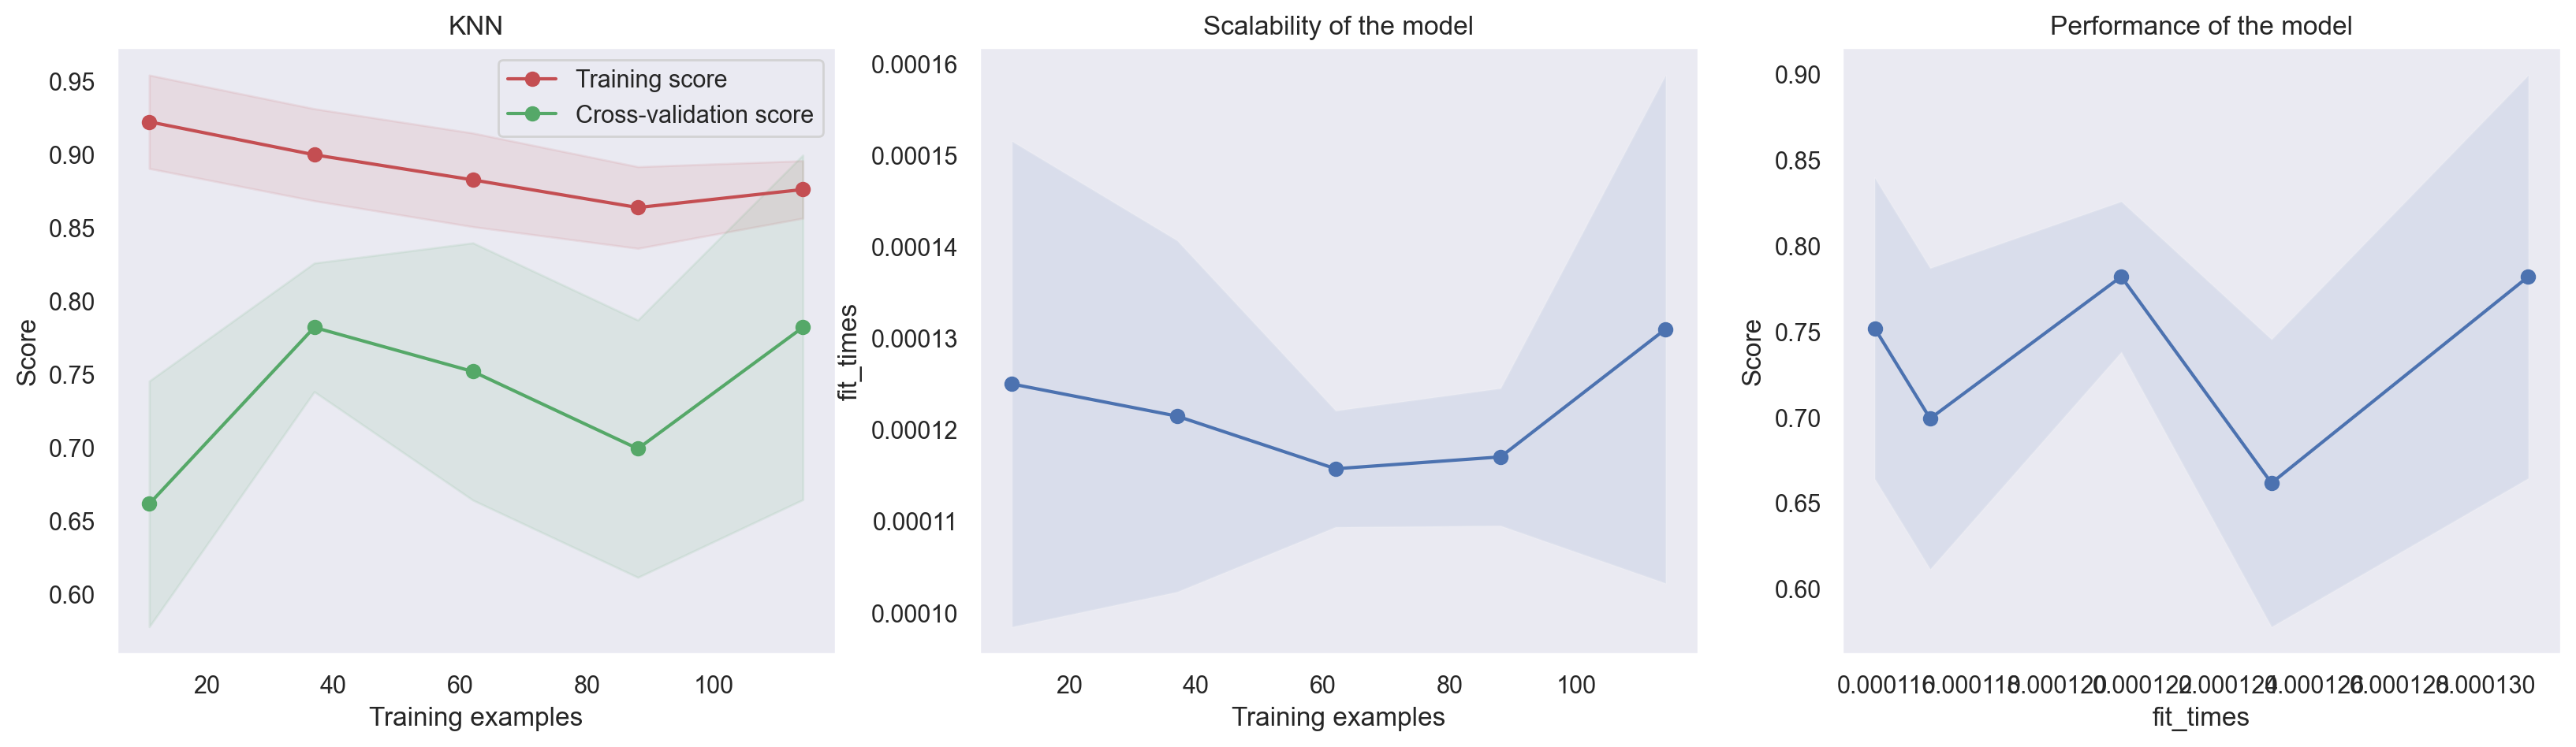

In [10]:
plot_learning_curve(knn, "KNN", X_train, y_train, cv=7);

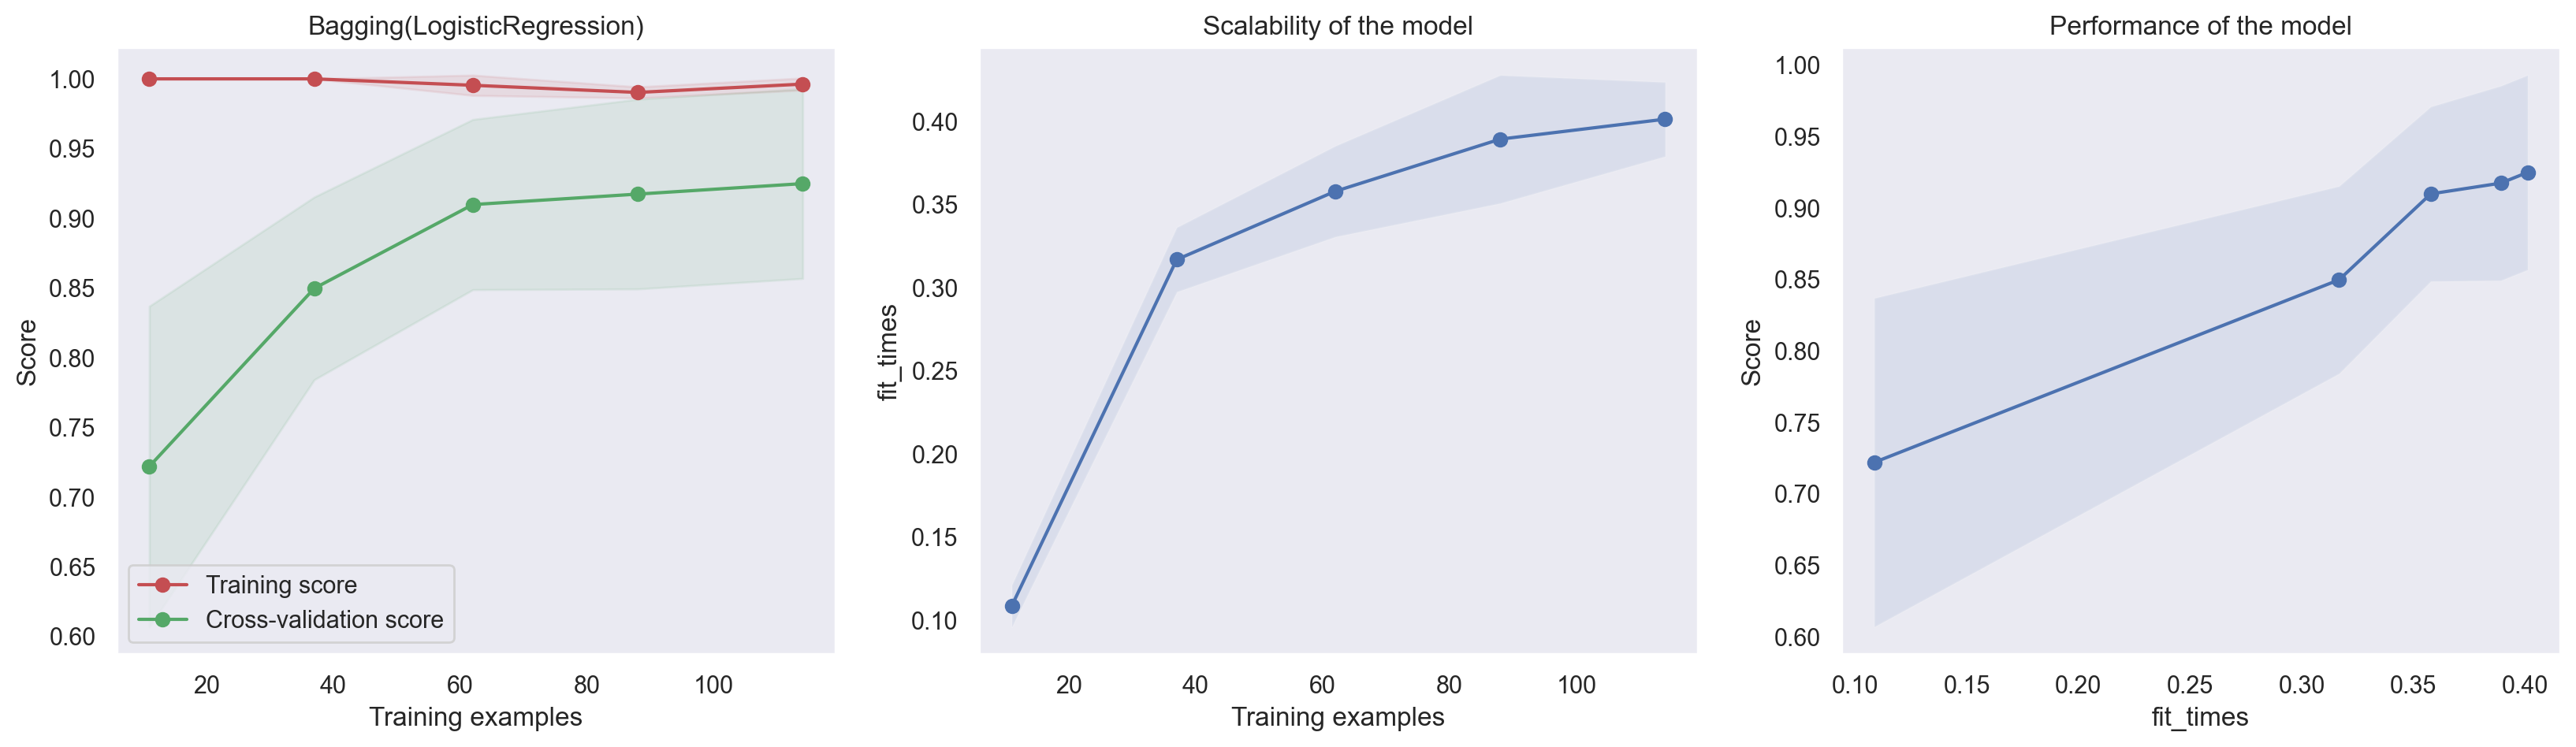

In [11]:
plot_learning_curve(clf, "Bagging(LogisticRegression)", X_train, y_train, cv=7);

## Random Forest

Another example of bagging algorithm is the RandomForest.

Indeed, a forest is an ensemble of trees: the base estimator of random forest is decision tree.

One can manually create a forest, by using the Scikit-Learn's BaggingClassifier meta-estimator seen above. 
However, in practice, decision trees are more effectively randomised by injecting some _stochasticity_ in how the splits are chosen rather than in input data: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness.
Hence, the difference between `BaggingClassifier()` and `RandomForestClassifier()` is in how we compose the _bags_ in bootstrap sampling.

For example, when determining which feature to split on, the randomised tree might select from among the top several features. 
You can read more technical details about these randomization strategies in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and references within.

### An old friend: Decision Tree

Here we revise the example for revision tree and we compare with the random forest analogous.

First of all, let's build a synthetic dataset.


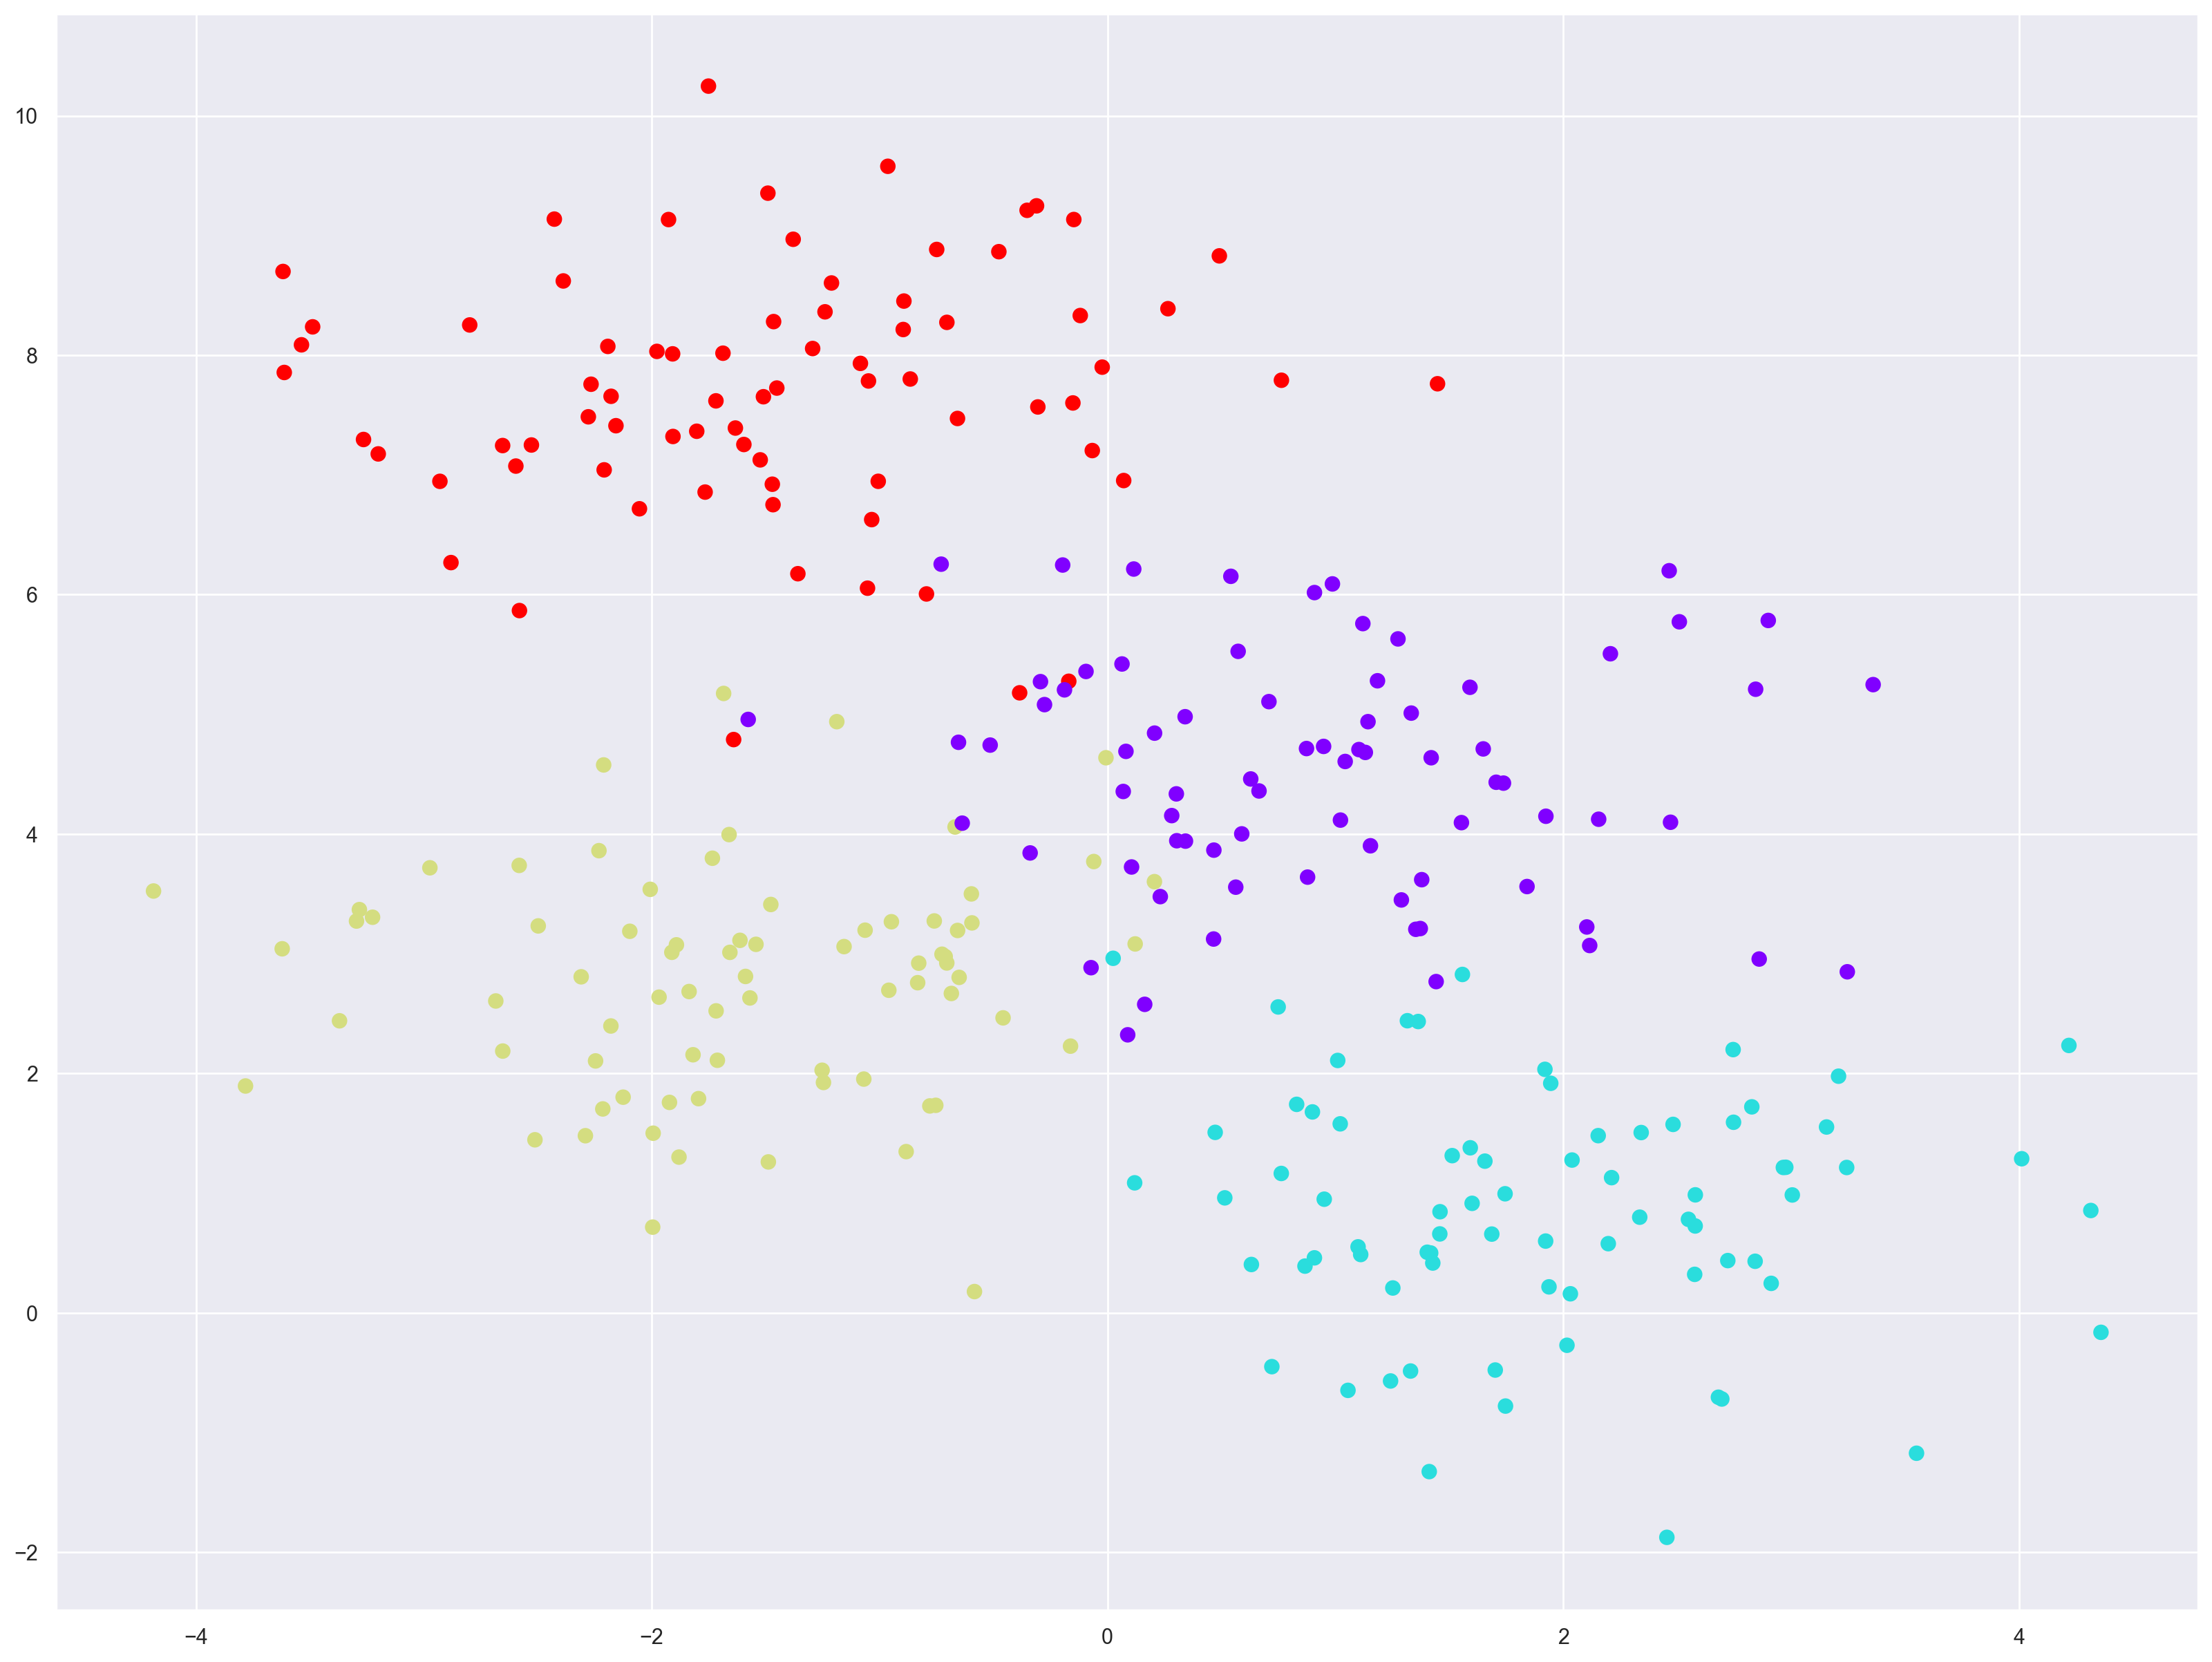

In [12]:
# Generate data and plot them
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(20,15))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

We can now plot model splitting to see how the decision tree splits data according to features.

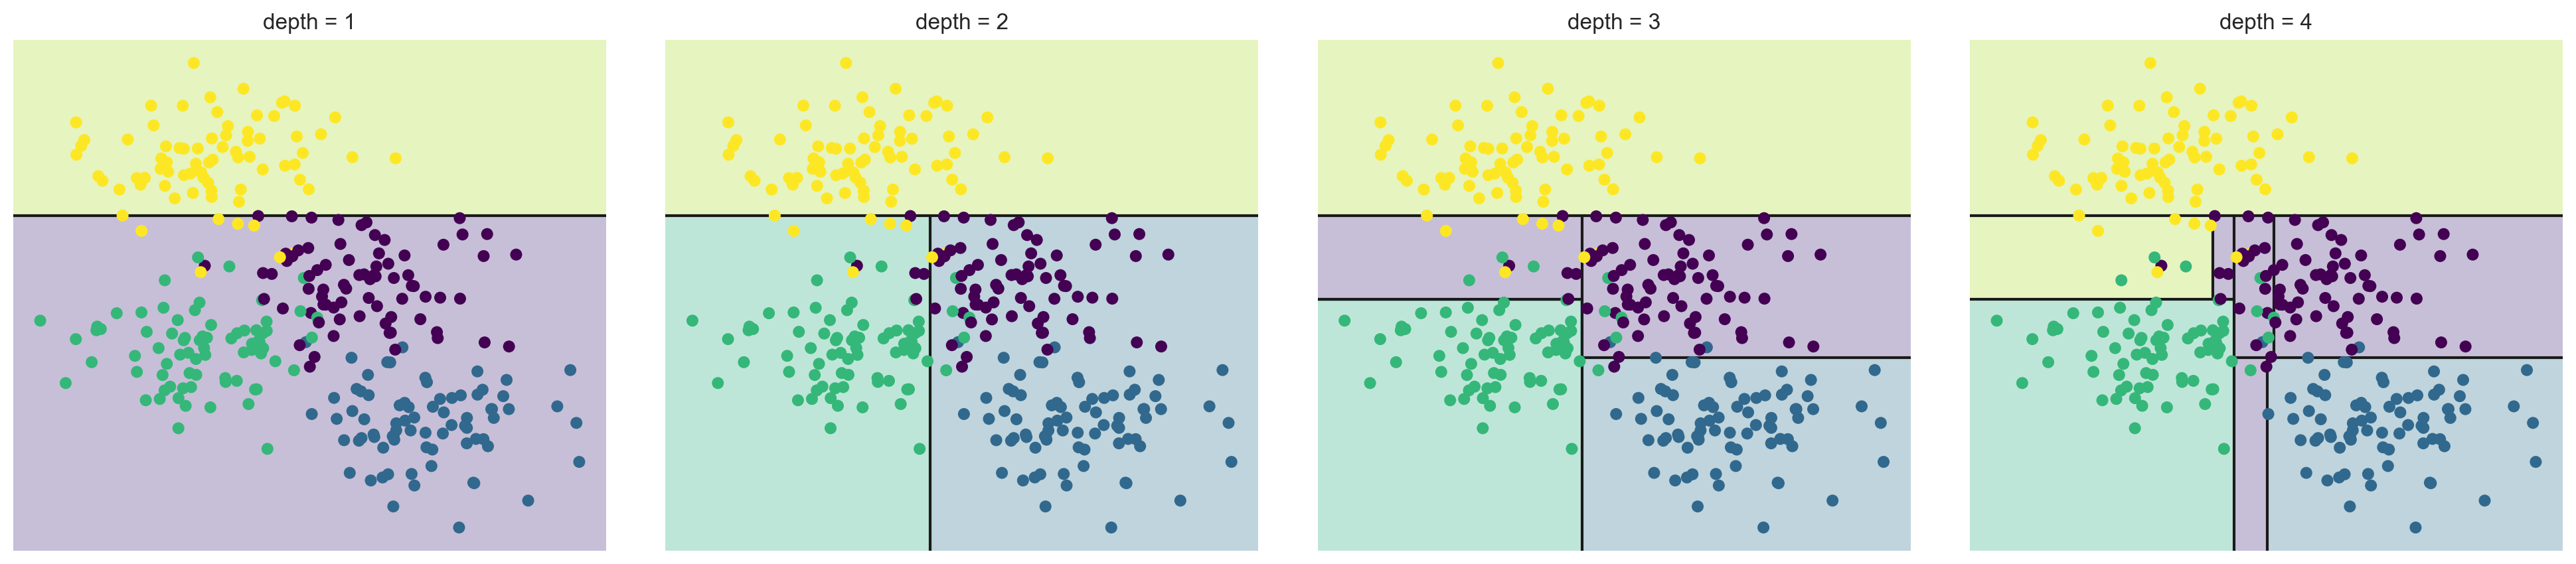

In [13]:
# Plot model splitting
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

In [14]:
plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

We have already discussed how as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data. That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.

##### Overfitting

We have seen also that over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. 

Another way to see this over-fitting is to look at models trained on different subsets of the data (can you relate to bootstrap sampling?)-- for example, in this figure we train two different trees, each on half of the original data.

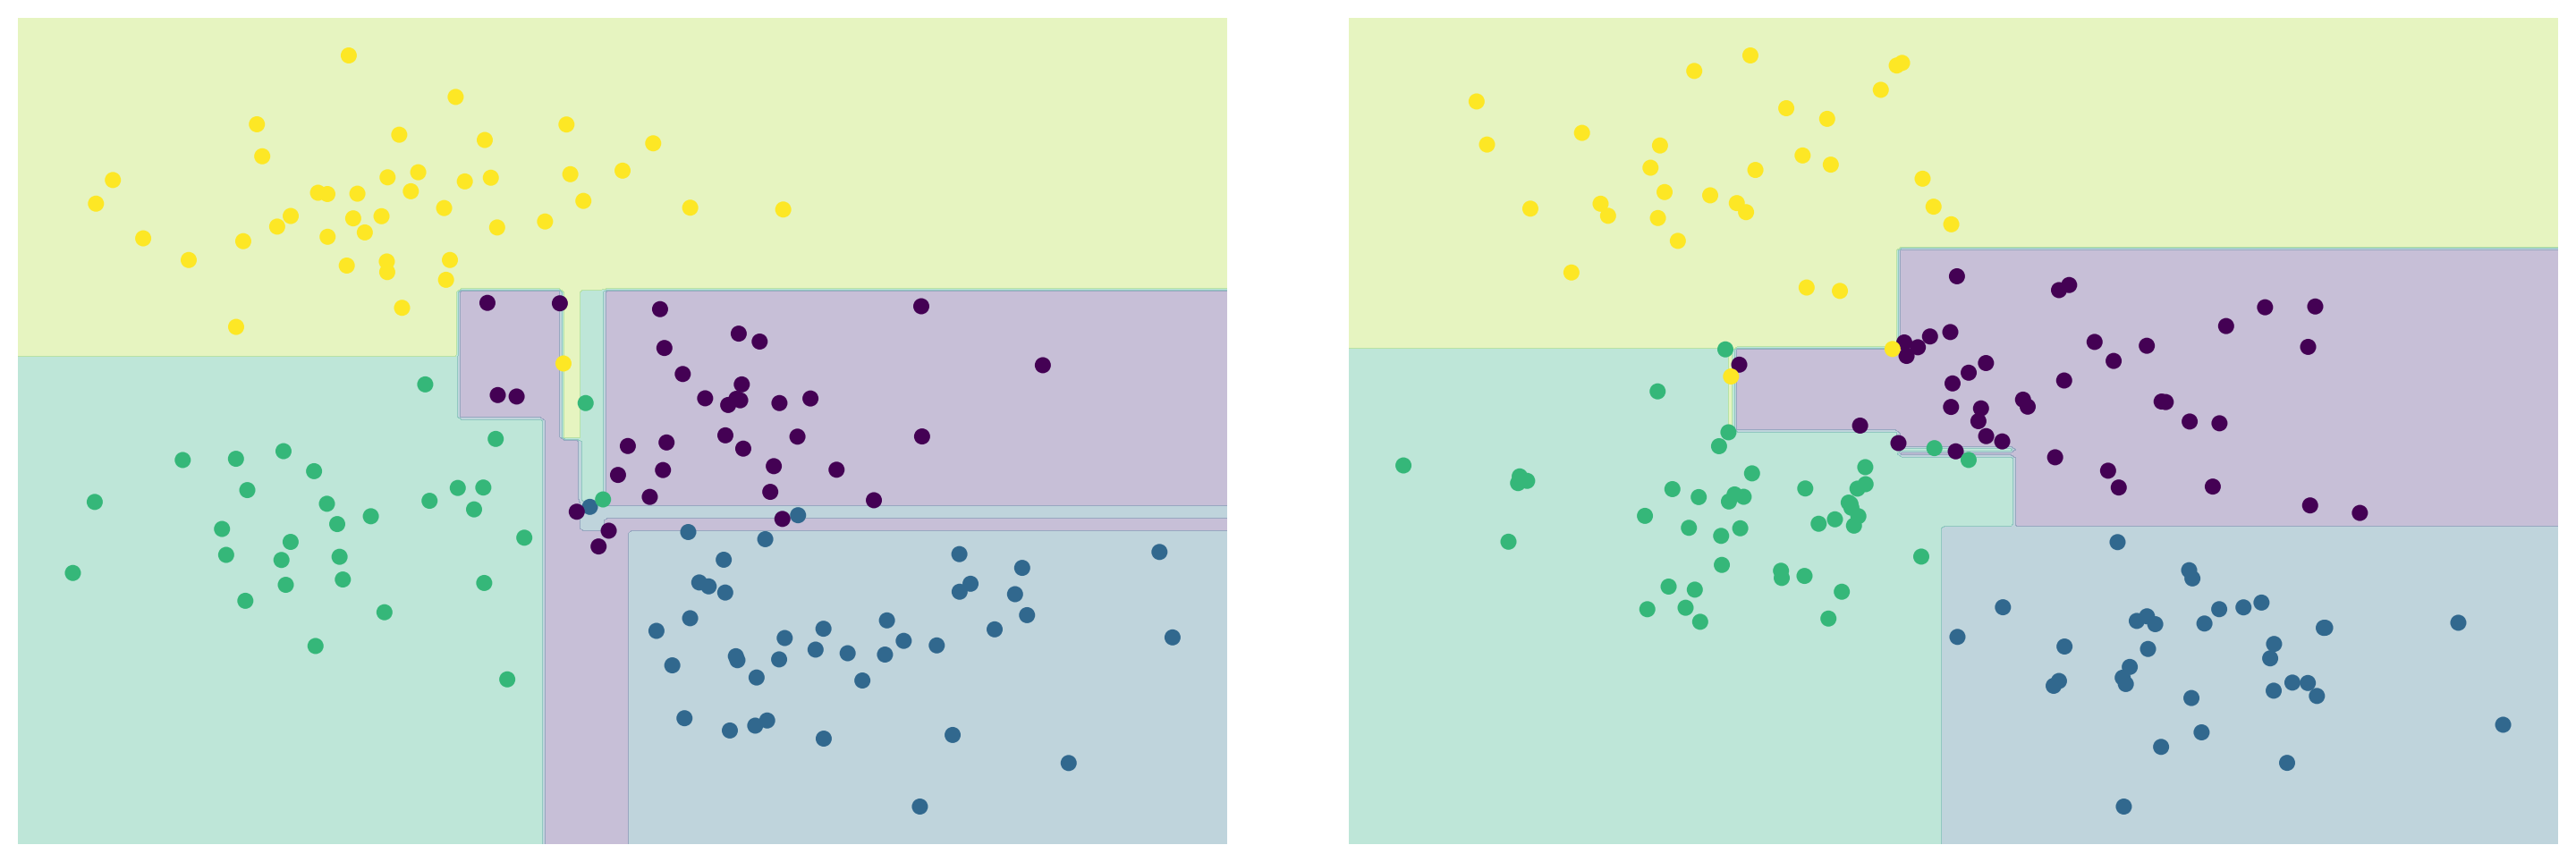

In [15]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result!

In [16]:
randomized_tree_interactive(X, y) # The function combines the two trees

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

#### Random Forest

We have mentioned that one can compose a random forest by the bagging classifier, however, decision trees are more effectively randomised by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness. 

For example, when determining which feature to split on, the randomized tree might select from among the top several features.

In Scikit-Learn, such an optimised ensemble of randomized decision trees is implemented in the `RandomForestClassifier` estimator, which takes care of all the randomisation automatically. 
All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees.

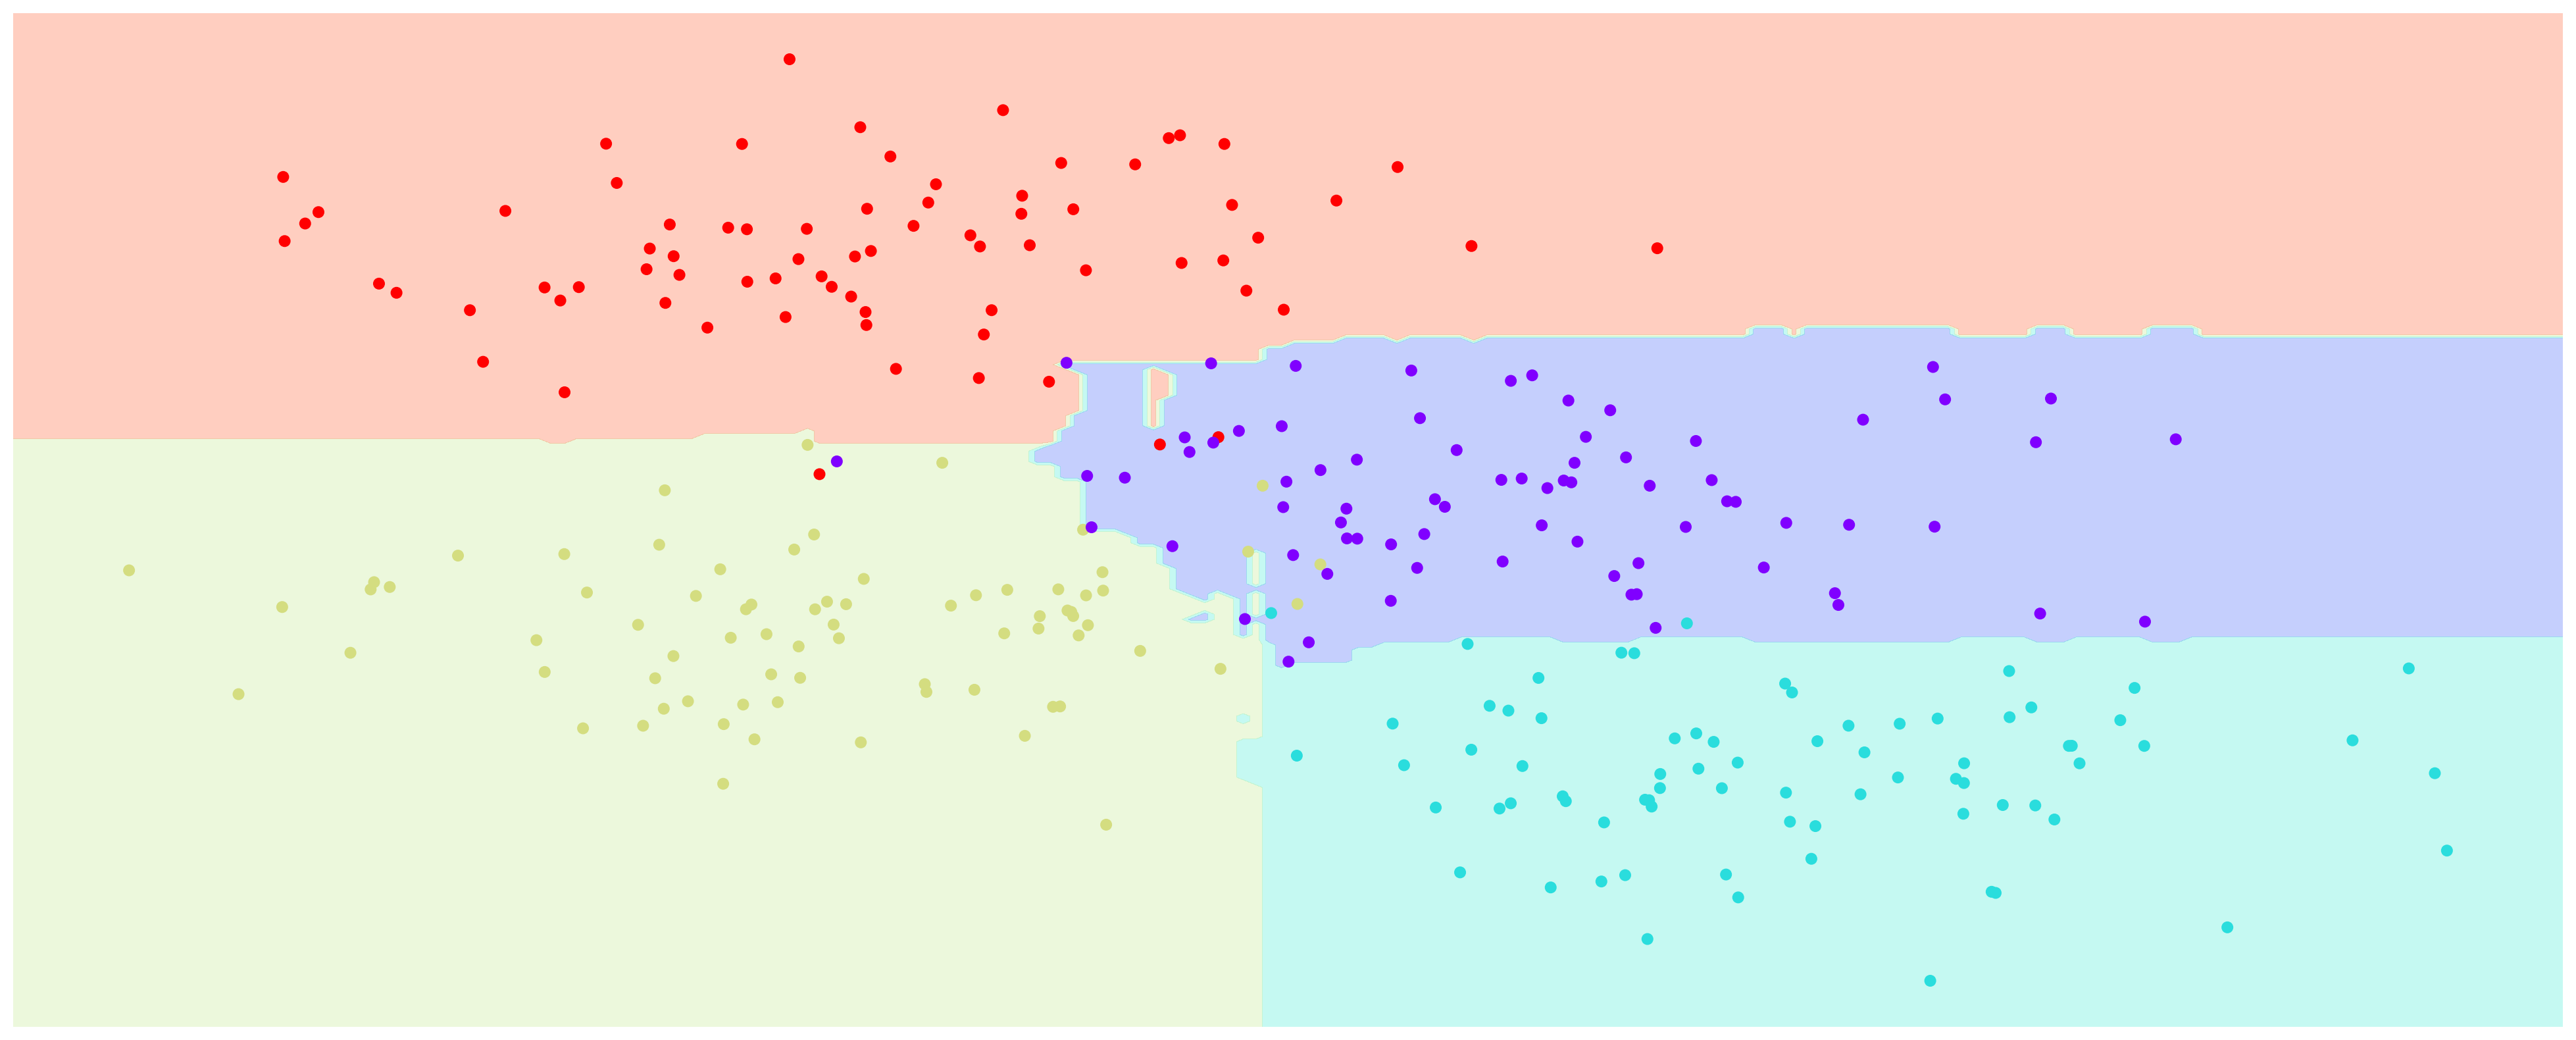

In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
visualize_classifier(model, X, y);

Definitely better! We see that by averaging over $100$ randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.